In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
import json
% matplotlib inline

In [2]:
# Importation des données
path='data/'
data_HR =  pd.read_csv(path+"HR_edges.csv",sep=',')
data_HU =  pd.read_csv(path+"HU_edges.csv",sep=",")
data_RO =  pd.read_csv(path+"RO_edges.csv",sep=",")
genre_HR = pd.read_csv(path+"HR_genres.csv",sep=",")
genre_HU = pd.read_csv(path+"HU_first_genre.csv",sep=",")
genre_RO = pd.read_csv(path+"RO_first_genre.csv",sep=",")
genres_parents = pd.read_csv(path+"genres_parents.csv",sep=',')

In [ ]:
# On nettoie ci-dessous nos données
for k in range(len(genre_HU['genre'])):
    if genre_HU.iloc[k,1]=='R&amp;B':
        genre_HU.set_value(k,"genre",'R&B')
    if genre_HU.iloc[k,1]=='Spirituality &amp; Religion':
        genre_HU.set_value(k,"genre",'Spirituality & Religion')
    if genre_HU.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_HU.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_HU.iloc[k,1]=='Singer &amp; Songwriter':
        genre_HU.set_value(k,"genre",'Singer & Songwriter')
    if genre_HU.iloc[k,1]=='Soul &amp; Funk':
        genre_HU.set_value(k,"genre",'Soul & Funk')
    if genre_HU.iloc[k,1]=='TV shows &amp; movies':
        genre_HU.set_value(k,"genre",'TV shows & movies')
    if genre_HU.iloc[k,1]=='Contemporary R&amp;B':
        genre_HU.set_value(k,"genre",'Contemporary R&B')
    if genre_HU.iloc[k,1]=='Oldschool R&amp;B':
        genre_HU.set_value(k,"genre",'Oldschool R&B')
for k in range(len(genre_RO['genre'])):    
    if genre_RO.iloc[k,1]=='R&amp;B':
        genre_RO.set_value(k,"genre",'R&B')
    if genre_RO.iloc[k,1]=='Spirituality &amp; Religion':
        genre_RO.set_value(k,"genre",'Spirituality & Religion')
    if genre_RO.iloc[k,1]=='Rock &amp; Roll/Rockabilly':
        genre_RO.set_value(k,"genre",'Rock & Roll/Rockabilly')
    if genre_RO.iloc[k,1]=='Singer &amp; Songwriter':
        genre_RO.set_value(k,"genre",'Singer & Songwriter')
    if genre_RO.iloc[k,1]=='Soul &amp; Funk':
        genre_RO.set_value(k,"genre",'Soul & Funk')
    if genre_RO.iloc[k,1]=='TV shows &amp; movies':
        genre_RO.set_value(k,"genre",'TV shows & movies')
    if genre_RO.iloc[k,1]=='Contemporary R&amp;B':
        genre_RO.set_value(k,"genre",'Contemporary R&B')
    if genre_RO.iloc[k,1]=='Oldschool R&amp;B':
        genre_RO.set_value(k,"genre",'Oldschool R&B')
    if genre_RO.iloc[k,1]=='Kids &amp; Family':
        genre_RO.se

In [3]:
# Importation des genres préférés des utilisateurs
json_HR = open(path+'HR_genres.json').read()
json_HR_data = json.loads(json_HR)
json_HU = open(path+'HU_genres.json').read()
json_HU_data = json.loads(json_HU)
json_RO = open(path+'RO_genres.json').read()
json_RO_data = json.loads(json_RO)

In [4]:
def recommandation(user_ID,Prob,LProb,pref):
    L=pref[str(user_ID)]
    style=None
    l=1
    while style==None:
        for k in L:
            if k not in LProb:
                j= int(np.random.randint(0, len(LProb)-1, size=1))
            else:
                j= LProb.index(k)
            H=np.argsort(Prob_HR[j])
            a=H[-l]
            if LProb[a] not in L:
                style=LProb[a]
                return(style)
            if l==len(H):
                return(None)
            l=l+1

In [5]:
# Importations des resultats nécessaires :
Prob_HR = np.loadtxt("Prob_HR.txt")
L=['Dirty South','Asian Music','Ranchera','Bolero','West Coast','Alternative','Trance','Dance','Film Scores','Soundtracks','Metal','Opera','Folk','Jazz','Indian Music','Rap/Hip Hop','Rock','Baroque','Indie Rock','Reggae','Contemporary R&B','Comedy','TV shows & movies','Techno/House','Blues','African Music','Bluegrass','Old school soul','Indie Rock/Rock pop','TV Soundtracks','Pop','Dubstep','Brazilian Music','Instrumental jazz','Oldschool R&B','Latin Music','Singer & Songwriter','Country Blues','Films/Games','Electric Blues','Soul & Funk','Vocal jazz','Nursery Rhymes','Kids & Family','Country','Sports','Spirituality & Religion','R&B','Urban Cowboy','Hard Rock','Chill Out/Trip-Hop/Lounge','Classical','Tropical','Rock & Roll/Rockabilly','International Pop','Dancefloor','Disco','Indie Pop/Folk','Electro','Classical Period','Jazz Hip Hop','Modern','Indie Pop','Delta Blues','Kids','Contemporary Soul','Electro Hip Hop','Dancehall/Ragga']
LHU=['Pop','Jazz','Singer & Songwriter','Oldschool R&B','Dancehall/Ragga','Baroque','East Coast','R&B','Grime','Reggae','Asian Music','Instrumental jazz','TV shows & movies','Contemporary Soul','Latin Music','Dance','Metal','Country','Films/Games','Comedy','African Music','Kids','Brazilian Music','Sports','Contemporary R&B','Trance','Old school soul','Dubstep','Folk','Indie Pop/Folk','Hard Rock','Soundtracks','Disco','Nursery Rhymes','Film Scores','Rock & Roll/Rockabilly','Soul & Funk','Classical','Electro','Tropical','TV Soundtracks','Chill Out/Trip-Hop/Lounge','International Pop','Indie Pop','Blues','Alternative Country','Indian Music','Indie Rock','Opera','Rap/Hip Hop','Rock','Urban Cowboy','Electric Blues','Dancefloor','Jazz Hip Hop','Indie Rock/Rock pop','Classical Period','Dirty South','Bolero','Spirituality & Religion','Country Blues','Alternative','Techno/House']
Prob_HU = np.loadtxt("Prob_HU.txt")
LRO=['Electro','Indie Pop','Trance','African Music','Alternative','Spirituality & Religion','Baroque','Pop','Dirty South','Tropical','Classical','Soundtracks','Jazz Hip Hop','Kids','Country Blues','East Coast','R&B','Film Scores','Brazilian Music','Chicago Blues','Techno/House','Folk','Soul & Funk','Singer & Songwriter','Rock','Reggae','Urban Cowboy','Nursery Rhymes','Dubstep','Blues','Metal','Hard Rock','Contemporary Soul','Jazz','Indie Rock/Rock pop','Films/Games','Classical Period','Comedy','Instrumental jazz','Rock & Roll/Rockabilly','Chill Out/Trip-Hop/Lounge','Indie Rock','International Pop','Opera','Musicals','Alternative Country','Indie Pop/Folk','Dancehall/Ragga','Indian Music','Kids & Family','Grime','Asian Music','Latin Music','Oldschool R&B','Sports','Modern','Disco','Country','Vocal jazz','Electric Blues','Contemporary R&B','Dance','TV Soundtracks','Rap/Hip Hop','Dancefloor','Bluegrass','Electro Hip Hop','Bolero']
Prob_RO = np.loadtxt("Prob_RO.txt")

## Etude de la Hongrie

In [6]:
# Certains Users ont des styles abérants on ne les consdière pas :
listereco=[]
for j in range(1,284):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(286,13212):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(13214,17185):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(17187,17863):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(17865,20568):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(20570,25481):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(25483,25700):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(25702,32588):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(32590,36311):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(36313,40006):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(40008,41911):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))
for j in range(41913,46975):
    listereco.append(recommandation(j,Prob_HU,LHU,json_HU_data))

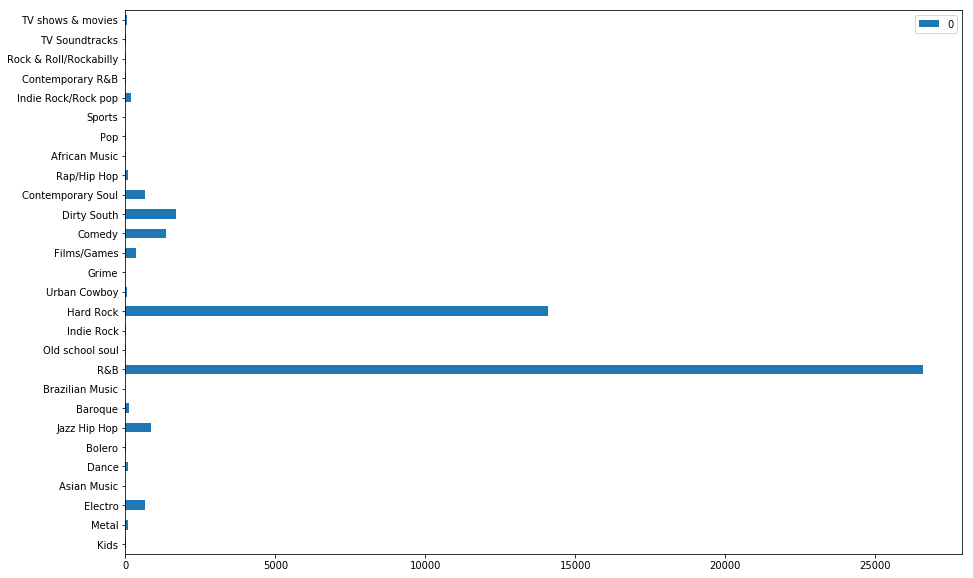

In [7]:
compte = dict([(k, listereco.count(k)) for k in set(listereco)])
test = pd.DataFrame.from_dict(compte,orient='index')
test.plot(kind='barh',figsize=(15,10))

## Etude de la Croatie

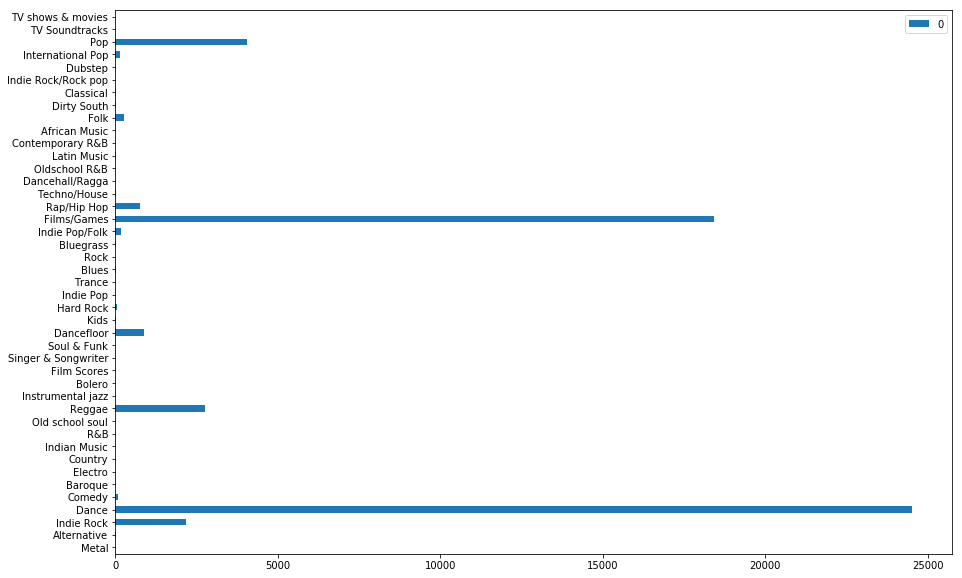

In [8]:
listereco2=[]
for j in range(0,max(genre_HR['id'])):
    listereco2.append(recommandation(j,Prob_HR,L,json_HR_data))
compte2 = dict([(k, listereco2.count(k)) for k in set(listereco2)])
test2 = pd.DataFrame.from_dict(compte2,orient='index')
test2.plot(kind='barh',figsize=(15,10))

## Etude de la Roumanie

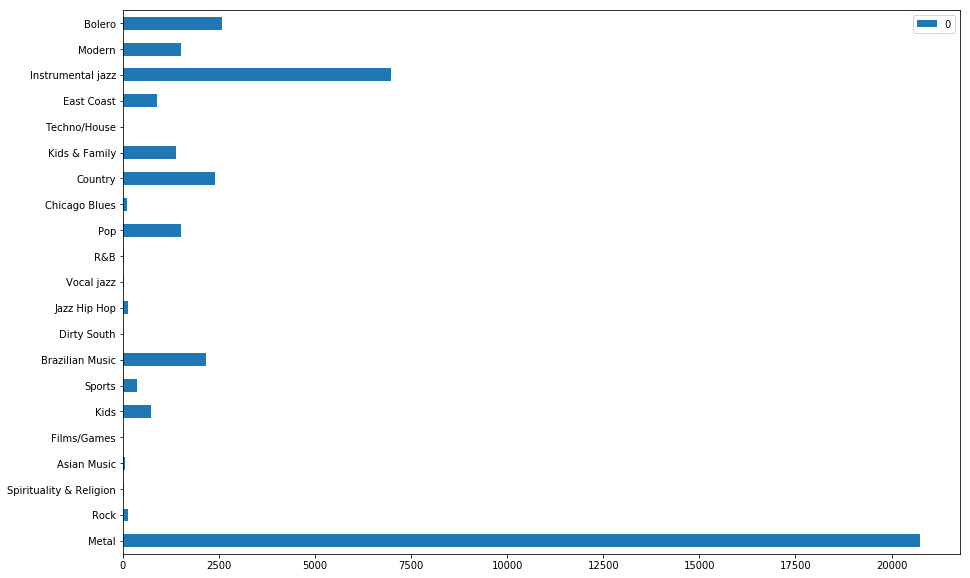

In [9]:
listereco3=[]
for j in range(0,max(genre_RO['id'])):
    listereco3.append(recommandation(j,Prob_RO,LRO,json_RO_data))
compte3 = dict([(k, listereco3.count(k)) for k in set(listereco3)])
test3 = pd.DataFrame.from_dict(compte3,orient='index')
test3.plot(kind='barh',figsize=(15,10))